In [23]:
import PIL
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [24]:
def normalize(X):
    '''
      Normalise data before processing
      Return normalized data and normalization parameters
    '''
    num = X.shape[1]
    NormParams = np.zeros((2, num))
    NormParams[0] = X.mean(axis=0)
    NormParams[1] = X.std(axis=0)

    X = (X - NormParams[0]) / NormParams[1]

    return X, NormParams    

In [25]:
def transform(X,n_components):
    '''
        Select components with largest variance:
            1) Estimate covariance matrix
            2) Find its eigenvalues and eigenvectors
            3) Check if eigenvalues are complex -> to real space
            4) Sort vals & vectors
            5) Select n components
            5) Project all data on the selected components  
    '''
    # оцінка коваріаційної матриці
    cov = np.dot(X.T, X) / len(X)
    
    e_val, e_vect = np.linalg.eig(cov)
    
    e_val = np.absolute(e_val)
    
    ind = np.argsort(-e_val)
    e_vect = e_vect[:, ind]
    e_vect = e_vect.astype(float)
    
    e_vect_reduced = e_vect[:, :n_components]
    new_X = np.dot(X, e_vect_reduced)
    return new_X, e_vect_reduced

In [26]:
def restore(X_reduced, evect_reduced, norm_params):
    '''
        Restore "original" values:
            1) Restore original size
            2) Rescale
    '''
    restored = np.dot(X_reduced, evect_reduced.T)
    for j in range((restored).shape[1]):
        restored[:, j] = (restored[:, j] * norm_params[1, j]) + norm_params[0][j]
    return restored

### Simple data

In [32]:
data = pd.read_csv('diamonds.csv')
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


Input data

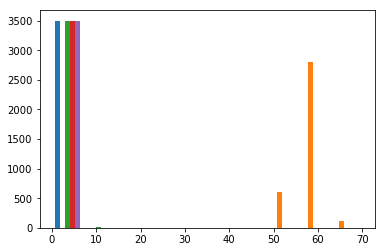

In [64]:
X = np.array(data[['carat','table','x','y','z']][0:3500],dtype=float)

number_of_components = 2

plt.hist(X)
plt.show()

In [65]:
# normalization
X_norm, norm_params = normalize(np.copy(X))

# dimension reduction
X_reduced, evect_reduced = transform(X_norm, number_of_components)

# restoring dimensions
restored_X = restore(X_reduced, evect_reduced,norm_params )

Normalized data

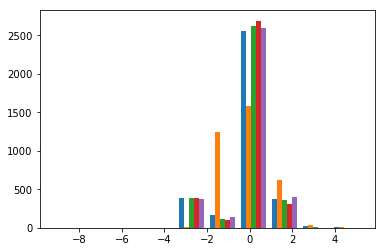

In [66]:
plt.hist(X_norm)
plt.show()

In [67]:
X.shape

(3500, 5)

Visualization

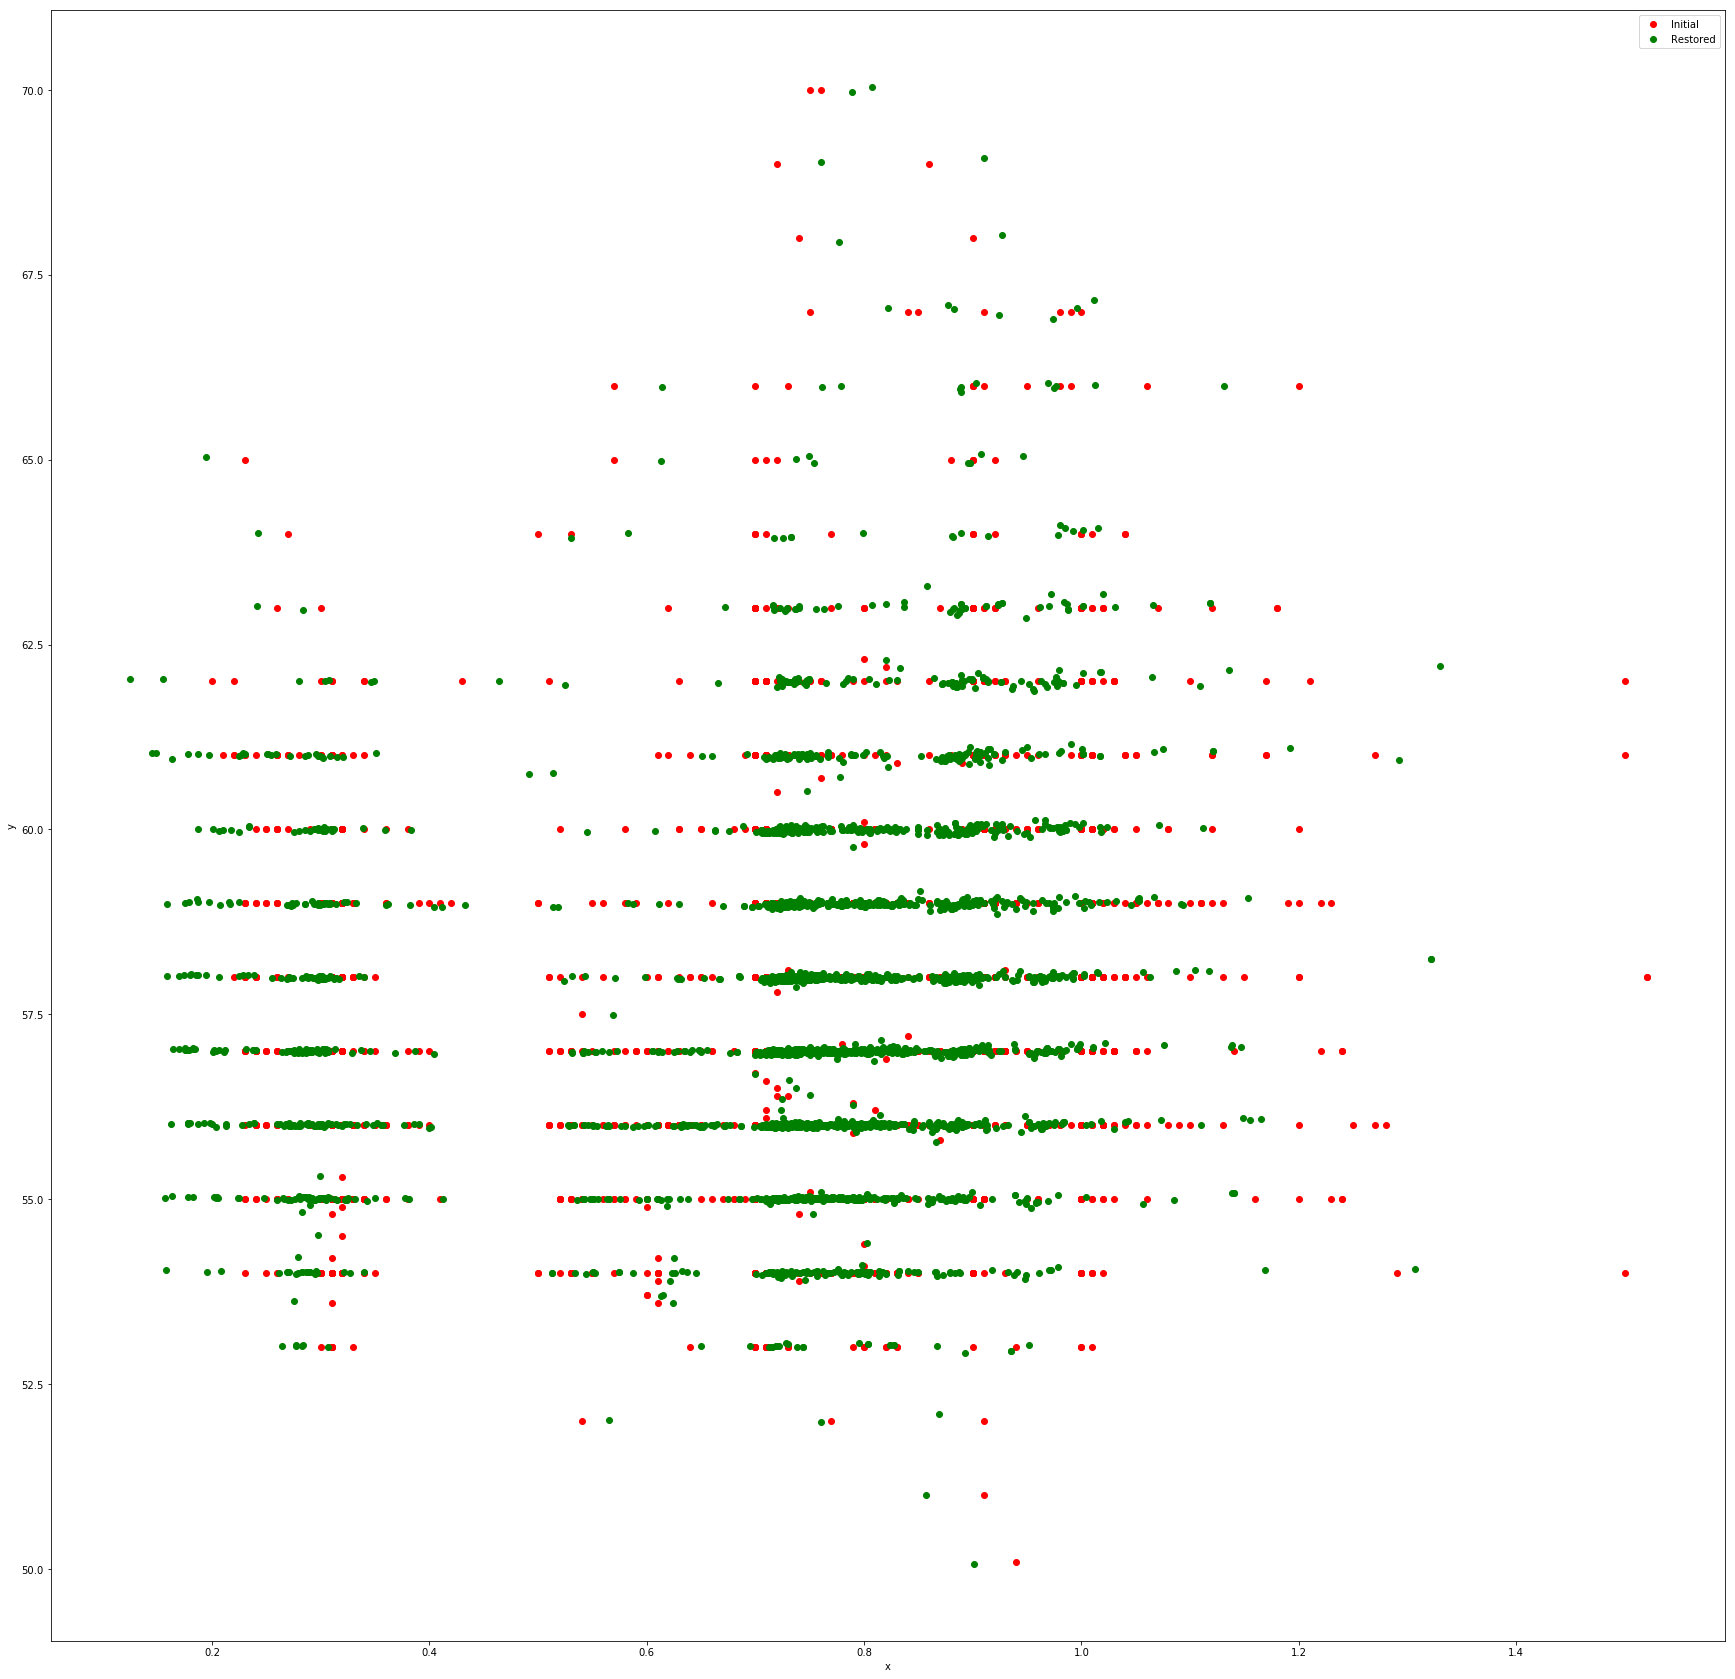

In [68]:
plt.figure(figsize=(30,30))
plt.scatter(X[:, 0], X[:, 1], label='Initial',color='red')
plt.scatter(restored_X[:, 0], restored_X[:, 1], label='Restored',color='green')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()